# INSTALLATIONS

In [1]:
install = True
run_test = True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [4]:
install = True
if install == True:
  from scipy import stats
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.pipeline import Pipeline, make_pipeline
  from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
  from sklearn.impute import SimpleImputer, KNNImputer
  from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
  from sklearn.metrics import make_scorer
  from sklearn.model_selection import cross_val_score
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.linear_model import Ridge, Lasso, LinearRegression
  from sklearn.svm import SVR
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
  from sklearn.ensemble import AdaBoostRegressor
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import VotingRegressor
  from sklearn.ensemble import GradientBoostingRegressor
  from sklearn.ensemble import StackingRegressor
  from sklearn.ensemble import RandomForestRegressor

# DEMANDE DU CLIENT

> Predire le CA de nos deux restaurants parisiens par jours et par services

# INITIALISATION DU PROJET

In [5]:
dataset_d16 = '/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project/raw_data/preproc_data_d16.csv'
dataset_d2 = '/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project/raw_data/preproc_data_d2.csv'
data_d16 = pd.read_csv(dataset_d16)
data_d2 = pd.read_csv(dataset_d2)
data_d16.head()

,date,jour,service,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-09-01,Dimanche,soir,4577.10,NaN,NaN,NaN,293.37,292.60,291.95,...,1.000000,-2.449294e-16,0.979530,0.201299,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
1,2019-09-01,Dimanche,midi,3548.00,NaN,NaN,NaN,294.08,293.35,292.94,...,1.000000,-2.449294e-16,0.979530,0.201299,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
2,2019-09-02,Lundi,soir,5726.50,NaN,NaN,NaN,294.00,293.08,292.25,...,0.623490,7.818315e-01,0.918958,0.394356,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
3,2019-09-02,Lundi,midi,2089.00,NaN,NaN,NaN,294.26,293.47,292.71,...,0.623490,7.818315e-01,0.918958,0.394356,-1.836970e-16,-1.0,-0.474951,-0.880012,-0.354605,-0.935016
4,2019-09-03,Mardi,soir,6983.75,NaN,NaN,NaN,294.45,293.94,291.78,...,-0.222521,9.749279e-01,0.820763,0.571268,-1.836970e-16,-1.0,-0.459733,-0.888057,-0.354605,-0.935016


In [6]:
data_d16.columns

Index(['date', 'jour', 'service', 'CA_TTC', 'moyen_7_services',
       'moyen_31_services', 'moyenne_3der_j&service', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'wind_speed', 'clouds_all', 'clear', 'clouds',
       'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm',
       'match_edf', 'match_happening', 'match_happening_cl', 'roland_garros',
       'fashion_week', 'vacances_paris', 'cos_jour_de_sem', 'sin_jour_de_sem',
       'cos_jour_du_mois', 'sin_jour_du_mois', 'cos_mois_de_annee',
       'sin_mois_de_annee', 'cos_jour_annee', 'sin_jour_annee',
       'cos_semaine_annee', 'sin_semaine_annee'],
      dtype='object')

# DATA EXPLORATION

In [7]:
data_d16.shape

(730, 37)

In [8]:
data_d2.shape

(1234, 37)

In [9]:
data_d16.head(2)

,date,jour,service,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
0,2019-09-01,Dimanche,soir,4577.1,NaN,NaN,NaN,293.37,292.60,291.95,...,1.0,-2.449294e-16,0.97953,0.201299,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456
1,2019-09-01,Dimanche,midi,3548.0,NaN,NaN,NaN,294.08,293.35,292.94,...,1.0,-2.449294e-16,0.97953,0.201299,-1.836970e-16,-1.0,-0.490029,-0.871706,-0.464723,-0.885456


In [10]:
data_d16.tail(2)

,date,jour,service,CA_TTC,moyen_7_services,moyen_31_services,moyenne_3der_j&service,temp,feels_like,temp_min,...,cos_jour_de_sem,sin_jour_de_sem,cos_jour_du_mois,sin_jour_du_mois,cos_mois_de_annee,sin_mois_de_annee,cos_jour_annee,sin_jour_annee,cos_semaine_annee,sin_semaine_annee
728,2021-07-31,Samedi,midi,1655.5,2311.257143,2890.146774,2967.67,294.69,294.47,294.16,...,0.62349,-0.781831,1.0,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723
729,2021-07-31,Samedi,soir,8446.0,7023.707143,7844.804194,8480.98,293.83,293.55,292.49,...,0.62349,-0.781831,1.0,-2.449294e-16,-0.866025,-0.5,-0.873807,-0.486273,-0.885456,-0.464723


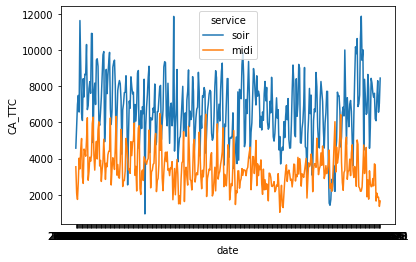

In [11]:
sns.lineplot(data = data_d16, x = 'date' ,y = 'CA_TTC', hue = 'service');

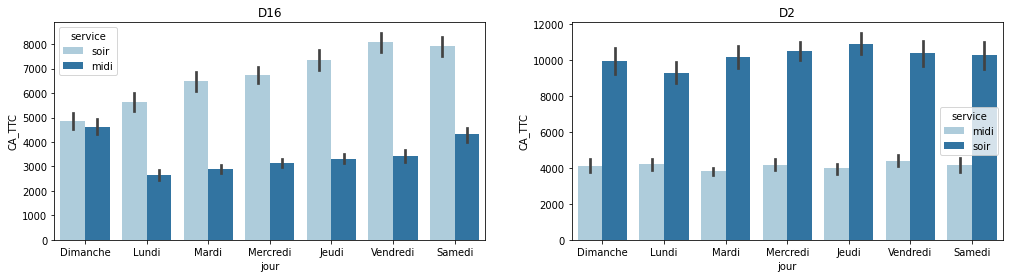

In [12]:
palette = sns.color_palette("Paired")
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.barplot(data = data_d16, x = 'jour', y = 'CA_TTC', hue = 'service' , palette=palette, orient = 'v').set_title("D16");
plt.subplot(1,2,2)
sns.barplot(data = data_d2, x = data_d16.jour, y = 'CA_TTC', hue = 'service', hue_order= ['midi','soir'], palette=palette, orient='v').set_title("D2");
plt.show()

# WEATHER FEATURES

In [13]:
weather_sorted = {
'clear' : ['sky is clear', np.nan, np.nan,np.nan], 
'clouds' : ['scattered clouds','few clouds','broken clouds','overcast clouds'],
'drizzle' : ['light intensity drizzle','drizzle','heavy intensity drizzle',np.nan], 
'drizzle_and_rain' : ['light intensity drizzle rain','rain and drizzle',np.nan,np.nan],
'fog' : ['fog', np.nan, np.nan,np.nan], 
'haze' : ['haze', np.nan, np.nan,np.nan], 
'mist' : ['mist', np.nan, np.nan,np.nan], 
'rain' : ['light rain','light intensity shower rain','moderate rain', 'heavy intensity rain'], 
'snow' : ['light snow', np.nan, np.nan,np.nan], 
'thunderstorm' : ['proximity thunderstorm', 'thunderstorm', 'thunderstorm with light rain','thunderstorm with heavy rain'] 
}

weather_sorted_df = pd.DataFrame(data=weather_sorted)
weather_sorted_df

,clear,clouds,drizzle,drizzle_and_rain,fog,haze,mist,rain,snow,thunderstorm
0,sky is clear,scattered clouds,light intensity drizzle,light intensity drizzle rain,fog,haze,mist,light rain,light snow,proximity thunderstorm
1,NaN,few clouds,drizzle,rain and drizzle,NaN,NaN,NaN,light intensity shower rain,NaN,thunderstorm
2,NaN,broken clouds,heavy intensity drizzle,NaN,NaN,NaN,NaN,moderate rain,NaN,thunderstorm with light rain
3,NaN,overcast clouds,NaN,NaN,NaN,NaN,NaN,heavy intensity rain,NaN,thunderstorm with heavy rain


In [14]:
#data_d16.weather_description.unique()

In [15]:
#weather_sorted_df

In [16]:
#data_d16.columns

In [17]:
#weather_sorted.keys()

In [18]:
for i in weather_sorted.values():
  print(i)

['sky is clear', nan, nan, nan]
['scattered clouds', 'few clouds', 'broken clouds', 'overcast clouds']
['light intensity drizzle', 'drizzle', 'heavy intensity drizzle', nan]
['light intensity drizzle rain', 'rain and drizzle', nan, nan]
['fog', nan, nan, nan]
['haze', nan, nan, nan]
['mist', nan, nan, nan]
['light rain', 'light intensity shower rain', 'moderate rain', 'heavy intensity rain']
['light snow', nan, nan, nan]
['proximity thunderstorm', 'thunderstorm', 'thunderstorm with light rain', 'thunderstorm with heavy rain']


In [19]:
def weather_cat(x, list_values):
  for values in list_values:
    if x == values:
      return values

In [20]:
#x = data_test.reset_index()
#x = x.loc[0]
#print(x)

In [21]:
#set(data_test.weather_description)

# OTHER FEATURES

In [22]:
#data_d16.to_csv(path_or_buf='data_d16.csv', index= False)
#data_d2.to_csv(path_or_buf='data_d2.csv', index= False)

In [23]:
#data_test

In [24]:
#list(set(data_test.Clouds))

In [25]:
#list(set(data_test.Clouds))

In [26]:
#data_test.keys()

# PREPROCESING

In [27]:
dataTypeSeries = data_d16.dtypes
dataTypeSeries_valuecounts = data_d16.dtypes.value_counts()
print(dataTypeSeries_valuecounts)

float64    21
object     11
int64       5
dtype: int64


In [28]:
feat_numerical_nunique_d2 = pd.DataFrame(data_d2.select_dtypes(exclude=['object'],include=['int64','float64']).nunique(), columns = ["unique_values"])
feat_numerical_nunique_d2

,unique_values
CA_TTC,1216
moyen_7_services,1218
moyen_31_services,1172
moyenne_3der_j&service,1174
temp,990
feels_like,1025
temp_min,579
temp_max,649
wind_speed,40
clouds_all,7


In [29]:
feat_categorical_nunique_d2 = pd.DataFrame(data_d2.select_dtypes(include=['object'],exclude=['int64','float64']).nunique(), columns = ["unique_values"])
feat_categorical_nunique_d2

,unique_values
date,624
jour,7
service,2
clear,2
clouds,5
drizzle,4
drizzle_and_rain,3
fog,2
mist,2
rain,5


In [30]:
feat_numerical_nunique_d16 = pd.DataFrame(data_d16.select_dtypes(exclude=['object'],include=['int64','float64']).nunique(), columns = ["unique_values"])
feat_numerical_nunique_d16

,unique_values
CA_TTC,713
moyen_7_services,715
moyen_31_services,668
moyenne_3der_j&service,671
temp,630
feels_like,654
temp_min,408
temp_max,449
wind_speed,39
clouds_all,7


In [31]:
feat_categorical_nunique_d16 = pd.DataFrame(data_d16.select_dtypes(include=['object'],exclude=['int64','float64']).nunique(), columns = ["unique_values"])
feat_categorical_nunique_d16

,unique_values
date,371
jour,7
service,2
clear,2
clouds,5
drizzle,4
drizzle_and_rain,3
fog,2
mist,2
rain,5


In [32]:
#weather_sorted

In [33]:
feat_ordinal_dict = {
    'clear': ['0',0,'sky is clear'],
    'clouds': ['0',0,'scattered clouds','few clouds','broken clouds','overcast clouds'],
    'drizzle': ['0',0,'light intensity drizzle','drizzle','heavy intensity drizzle'],
    'drizzle_and_rain': ['0',0,'light intensity drizzle rain','rain and drizzle'],
    'fog': ['0',0,'fog'],
    'mist': ['0',0,'mist'],
    'rain': ['0',0,'light rain','light intensity shower rain','moderate rain','heavy intensity rain'],
    'thunderstorm': ['0',0,'proximity thunderstorm','thunderstorm','thunderstorm with light rain','thunderstorm with heavy rain']
}

feat_ordinal = sorted(feat_ordinal_dict.keys()) # sort alphabetically
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    dtype= np.int64,
    handle_unknown="use_encoded_value",
    unknown_value=-1 # Considers unknown values as worse than "missing"
)

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    encoder_ordinal,
    RobustScaler()
)

preproc_ordinal

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['0', 0, 'sky is clear'],
                                            ['0', 0, 'scattered clouds',
                                             'few clouds', 'broken clouds',
                                             'overcast clouds'],
                                            ['0', 0, 'light intensity drizzle',
                                             'drizzle',
                                             'heavy intensity drizzle'],
                                            ['0', 0,
                                             'light intensity drizzle rain',
                                             'rain and drizzle'],
                                            ['0', 0, 'fog'], ['0', 0, 'mist'],
                                            ['0', 0, 'light rain',
                                             'light intensity shower rain',
                                             'moderate rain',
                                             'heavy intensity rain'],
                                            ['0', 0, 'proximity thunderstorm',
                                             'thunderstorm',
                                             'thunderstorm with light rain',
                                             'thunderstorm with heavy rain']],
                                dtype=<class 'numpy.int64'>,
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('robustscaler', RobustScaler())])

In [34]:
feat_numerical_nunique_d16

,unique_values
CA_TTC,713
moyen_7_services,715
moyen_31_services,668
moyenne_3der_j&service,671
temp,630
feels_like,654
temp_min,408
temp_max,449
wind_speed,39
clouds_all,7


In [35]:
print(list(pd.DataFrame(data_d16.select_dtypes(include=['object'],exclude=['int64','float64']).nunique(), columns = ["unique_values"]).index))
print(list(pd.DataFrame(data_d16.select_dtypes(exclude=['object'],include=['int64','float64']).nunique(), columns = ["unique_values"]).index))

['date', 'jour', 'service', 'clear', 'clouds', 'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm']
['CA_TTC', 'moyen_7_services', 'moyen_31_services', 'moyenne_3der_j&service', 'temp', 'feels_like', 'temp_min', 'temp_max', 'wind_speed', 'clouds_all', 'match_edf', 'match_happening', 'match_happening_cl', 'roland_garros', 'fashion_week', 'vacances_paris', 'cos_jour_de_sem', 'sin_jour_de_sem', 'cos_jour_du_mois', 'sin_jour_du_mois', 'cos_mois_de_annee', 'sin_mois_de_annee', 'cos_jour_annee', 'sin_jour_annee', 'cos_semaine_annee', 'sin_semaine_annee']


In [36]:
data_d16.date.value_counts()

2019-09-01    2
2020-08-26    2
2020-08-07    2
2020-08-06    2
2020-08-05    2
             ..
2019-12-12    1
2019-10-03    1
2020-09-19    1
2020-08-24    1
2020-01-09    1
Name: date, Length: 371, dtype: int64

In [37]:
data_d16.columns

Index(['date', 'jour', 'service', 'CA_TTC', 'moyen_7_services',
       'moyen_31_services', 'moyenne_3der_j&service', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'wind_speed', 'clouds_all', 'clear', 'clouds',
       'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm',
       'match_edf', 'match_happening', 'match_happening_cl', 'roland_garros',
       'fashion_week', 'vacances_paris', 'cos_jour_de_sem', 'sin_jour_de_sem',
       'cos_jour_du_mois', 'sin_jour_du_mois', 'cos_mois_de_annee',
       'sin_mois_de_annee', 'cos_jour_annee', 'sin_jour_annee',
       'cos_semaine_annee', 'sin_semaine_annee'],
      dtype='object')

In [42]:
data_d2.dtypes

date                       object
jour                       object
service                    object
CA_TTC                    float64
moyen_7_services          float64
moyen_31_services         float64
moyenne_3der_j&service    float64
temp                      float64
feels_like                float64
temp_min                  float64
temp_max                  float64
wind_speed                float64
clouds_all                  int64
clear                      object
clouds                     object
drizzle                    object
drizzle_and_rain           object
fog                        object
mist                       object
rain                       object
thunderstorm               object
match_edf                   int64
match_happening           float64
match_happening_cl        float64
roland_garros               int64
fashion_week                int64
vacances_paris              int64
cos_jour_de_sem           float64
sin_jour_de_sem           float64
cos_jour_du_mo

In [47]:
data_d2.match_happenin

1

In [38]:
categorical_features = ['date','jour', 'service', 'match_happening', 'match_happening_cl', 'match_edf', 'roland_garros', 'fashion_week','vacances_paris']
cyclical_features = ['cos_jour_de_sem','sin_jour_de_sem', 'cos_jour_du_mois', 'sin_jour_du_mois','cos_mois_de_annee', 'sin_mois_de_annee', 'cos_jour_annee','sin_jour_annee', 'cos_semaine_annee', 'sin_semaine_annee']
numerical_features = ['moyen_7_services','moyen_31_services','moyenne_3der_j&service','temp', 'feels_like', 'temp_min', 'temp_max', 'wind_speed', 'clouds_all']
ordinal_features =['clear', 'clouds', 'drizzle', 'drizzle_and_rain', 'fog', 'mist', 'rain', 'thunderstorm']

In [39]:
preproc_categorical = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_cyclical = make_pipeline(
    KNNImputer())

preproc_numerical = make_pipeline(
    KNNImputer(),
    RobustScaler())

preproc = make_column_transformer(
    (preproc_categorical, categorical_features),
    (preproc_cyclical, cyclical_features),
    (preproc_numerical, numerical_features),
    (preproc_ordinal, ordinal_features),
    remainder ="drop")

pipe = make_pipeline(
    preproc,
)

In [40]:
pipe.fit_transform(data_d2)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

# MODEL TEST 1

In [ ]:
data_d16

In [ ]:
X_d2 = data_d2.drop(columns=["CA_TTC"])
y_d2 = data_d2.CA_TTC
X_d16 = data_d2.drop(columns=["CA_TTC"])
y_d16 = data_d2.CA_TTC
X_d2.head()

In [ ]:
X_d16.tail()

In [ ]:
y_d16

In [ ]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor(strategy = 'mean')
pipe_dummy = make_pipeline(pipe, model_dummy)
cross_val_score(pipe_dummy, X_d16, y_d16, cv=20).mean()

In [ ]:
model_ridge = Ridge()
pipe_ridge = make_pipeline(pipe, model_ridge)
cv_results = cross_val_score(pipe_ridge, X_d16, y_d16, cv=5).mean()
cv_results

# MODEL TEST 1

In [ ]:
X = X_d16
y = y_d16

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)
rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)
rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)
rmse_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_error(y_true, y_pred)**0.5)

In [ ]:
def root_mean_squared_log_error(y_true, y_pred):
    t = np.array(y_true)
    p = np.array(y_pred)
    log_error = np.log(1+t) - np.log(1+p)
    return ((log_error**2).mean())**0.5

In [ ]:
allow_grid_searching = True
# Cache the preprocessing step of the pipeline
from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()

In [ ]:
run_test = False
if run_test == True:
  # Ridge with normal target
  model = Ridge()
  rmsle = make_scorer(root_mean_squared_log_error)
  pipe_ridge = make_pipeline(preproc, model, memory=cachedir)
  cross_val_score(pipe_ridge, X, y, cv=5, scoring=rmsle).mean()

In [ ]:
run_test = True
if run_test == True:
  # Rige with log-target (much better)
  model = Ridge()
  pipe_ridge = make_pipeline(preproc, model, memory=cachedir)
  cross_val_score(pipe_ridge, X, y, cv=20, scoring=rmse).mean()

In [ ]:
run_test = False
if run_test == True:
  # GridSearch the Ridge regularization
  if allow_grid_searching:
      param_grid =  {'ridge__alpha': np.linspace(0.5,2,num=20)}
      search_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid, 
                                cv=5, n_jobs=-1, verbose=2, scoring=rmse_neg)

      search_ridge.fit(X, y);
      print(search_ridge.best_params_)
      search_ridge.best_score_

In [ ]:
run_test = False
if run_test == True:
  model = KNeighborsRegressor()
  pipe_knn = make_pipeline(preproc, model)
  scores = cross_val_score(pipe_knn, X, y, cv=5, scoring=rmse)
  scores.mean()

In [ ]:
run_test = False
if run_test == True:
  # GridSearch the KNN
  if allow_grid_searching:
      param_grid =  {'kneighborsregressor__n_neighbors': [3,4,5,6,7,8,9,10,15,20,30]}
      search_knn = GridSearchCV(pipe_knn, param_grid=param_grid, 
                                cv=3, n_jobs=-1, verbose=2, scoring=rmse_neg)

      search_knn.fit(X, y);
      print(search_knn.best_params_)
      search_knn.best_score_

In [ ]:
run_test = False
if run_test == True:
  model = SVR(kernel='linear')
  pipe_svm = make_pipeline(preproc, model, memory=cachedir)
  cross_val_score(pipe_svm, X, y, cv=5, scoring=rmse).mean()

In [ ]:
run_test = False
if run_test == True:
  model = SVR(kernel='rbf', C = 10)
  pipe_svm_rbf = make_pipeline(preproc, model, memory=cachedir)
  cross_val_score(pipe_svm_rbf, X, y, cv=5, scoring=rmse).mean()

In [ ]:
run_test = False
if run_test == True:
  # GridSearch
  if allow_grid_searching:
      param_grid =  {'svr__C': [0.5, 0.7, 1, 2, 5, 10],
                    'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
                    'svr__coef0': [0.0, 0.1, 0.5,1],
                    }
      search_svm_rbf = GridSearchCV(pipe_svm_rbf, param_grid=param_grid, 
                                cv=5, n_jobs=-1, verbose=2, scoring=rmse_neg)

      search_svm_rbf.fit(X, y);
      svm_rbf_best = search_svm_rbf.best_estimator_
      print(search_svm_rbf.best_params_)
      search_svm_rbf.best_score_

In [ ]:
run_test = False
if run_test == True:
  from sklearn.tree import DecisionTreeRegressor

  model = DecisionTreeRegressor(max_depth=50, min_samples_leaf=20)
  pipe = make_pipeline(preproc, model, memory=cachedir)
  score = cross_val_score(pipe, X, y, cv=5, scoring=rmse)
  print(score.std())
  score.mean()

In [ ]:
run_test = False
if run_test == True:
  # TODO: GridSearch
  model = RandomForestRegressor(max_depth=50,min_samples_leaf=20)
  pipe = make_pipeline(preproc, model, memory=cachedir)
  score = cross_val_score(pipe, X, y, cv=5, scoring=rmse)
  print(score.std())
  score.mean()

In [ ]:
run_test = False
if run_test == True:
  model = AdaBoostRegressor(
      base_estimator=DecisionTreeRegressor(max_depth=None))

  pipe = make_pipeline(preproc, model, memory=cachedir)
  score = cross_val_score(pipe, X, y, cv=5, scoring=rmse)
  print(score.std())
  score.mean()

In [ ]:
run_test = True
if run_test == True:
  model = GradientBoostingRegressor(n_estimators=100, verbose=0)
  pipe_gb = make_pipeline(preproc, model, memory=cachedir)
  score = cross_val_score(pipe_gb, X, y, cv=5, scoring=rmse)
  print(score.std())
  score.mean()

In [ ]:
run_test = False
if run_test == True:
  from scipy import stats
  run_test = False
  if run_test == True:
    if allow_grid_searching:
        grid = {
            'gradientboostingregressor__n_estimators': stats.uniform(50,300),
            #'gradientboostingregressor__learning_rate':stats.uniform(0.05,0.3),
            #'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
            #'gradientboostingregressor__max_depth': stats.randint(3,5),    
            #'gradientboostingregressor__min_samples_split':stats.randint(2,10),
            #'gradientboostingregressor__subsample':[0.95, 1], # 1 default
            'gradientboostingregressor__max_features':stats.uniform(0.7,1), # default None, i.e = n_features
        }

        search_gb = RandomizedSearchCV(pipe_gb, grid, scoring=rmse_neg, n_iter=8, cv=5, n_jobs=-1, verbose=2,)

        # Fit data to Grid Search
        search_gb.fit(X, y);
        print(search_gb.best_params_)
        search_gb.best_score_
        
        # Plot results of gridsearch
        df_cv_results_ = pd.DataFrame(search_gb.cv_results_)
        sns.scatterplot(x="param_gradientboostingregressor__n_estimators", y='mean_test_score', data=df_cv_results_)
        sns.scatterplot(x="param_gradientboostingregressor__max_features", y='mean_test_score', data=df_cv_results_)

In [ ]:
run_test = False
if run_test == True:
  gboost = GradientBoostingRegressor(n_estimators=100)
  ridge = Ridge()
  svm = SVR(C=1, epsilon=0.05)
  adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))


  model = VotingRegressor(
      estimators = [("gboost", gboost),
                    ("adaboost", adaboost),
                    ("ridge", ridge), 
                    ("svm_rbf", svm)],
      weights = [1,1,1,1], # to equally weight the two models
      n_jobs=-1
  )

  pipe_ensemble = make_pipeline(preproc, model, memory=cachedir)

  score = cross_val_score(pipe_ensemble, X, y, cv=5, scoring=rmse, n_jobs=-1)
  print(score.std())
  score.mean()

In [ ]:
run_test = False
if run_test == True:
  gboost = GradientBoostingRegressor(n_estimators=100)
  ridge = Ridge()
  svm = SVR(C=1, epsilon=0.05)
  adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))

  model = StackingRegressor(
      estimators=[("gboost", gboost),("adaboost", adaboost), ("svm_rbf", svm)],
      
      final_estimator=LinearRegression(),
      cv=5,
      n_jobs=-1
  )

  pipe_stacking = make_pipeline(preproc, model, memory=cachedir)
  score = cross_val_score(pipe_stacking, X, y, cv=5, scoring=rmse, n_jobs=-1)
  print(score.std())
  score.mean()

In [ ]:
run_test = False
if run_test == True:
  from xgboost import XGBRegressor
  # Create eval test just for early stopping purpose (XGBOOST)
  X_train, X_eval, y_train, y_eval = train_test_split(X,y,random_state=42)
  # Instanciate model
  model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.05)
  # Option 1: Integrate XGB into Sklearn's pipeline
  # It allows to GridSearchCV its best hyperparams
  pipe_xgb = make_pipeline(preproc, model_xgb)
  cross_val_score(pipe_xgb,X,y,cv=5,scoring=rmse,n_jobs=-1).mean()

In [ ]:
run_test = False
if run_test == True:
  # Option 2: Use XGBoost Library to fit it
  # It allows to use an early_stopping criteria with a Train/Val slit
  X_train_preproc = preproc.fit_transform(X_train, y_train)
  X_eval_preproc = preproc.transform(X_eval)

  model_xgb.fit(X_train_preproc, y_train,
          verbose=False,
          eval_set=[(X_train_preproc, y_train), (X_eval_preproc, y_eval)],
          eval_metric=["rmse"],
          early_stopping_rounds=10)

  # retrieve performance metrics
  results = model_xgb.evals_result()
  epochs = len(results['validation_0']["rmse"])
  x_axis = range(0, epochs)

  # plot rmsle loss
  fig, ax = plt.subplots()
  ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
  ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
  ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

  print("Best Validation Score", min(results['validation_1']['rmse']))

In [ ]:
run_test = False
if run_test == True:
  # xgboost for regression
  from numpy import asarray
  from numpy import mean
  from numpy import std
  from sklearn.datasets import make_regression
  from xgboost import XGBRegressor
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import RepeatedKFold
  from matplotlib import pyplot
  # define dataset

  # evaluate the model
  model = XGBRegressor(objective='reg:squarederror')
  pipe_xgboost = make_pipeline(preproc, model)
  n_scores = cross_val_score(pipe_xgboost, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  # fit the model on the whole dataset
  #model = XGBRegressor(objective='reg:squarederror')
  #model.fit(X, y)
  # make a single prediction
  #yhat = model.predict(X[2])
  #print('Prediction: %.3f' % yhat[0])

In [ ]:
X.head()

In [ ]:
run_test = False
if run_test == True:
  # lightgbm for regression
  from numpy import mean
  from numpy import std
  from sklearn.datasets import make_regression
  from lightgbm import LGBMRegressor
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import RepeatedKFold
  from matplotlib import pyplot
  # define dataset

  # evaluate the model
  model = LGBMRegressor()
  pipe_light = make_pipeline(preproc, model)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(pipe_light, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

  # fit the model on the whole dataset
  #model = LGBMRegressor()
  #model.fit(X, y)
  # make a single prediction
  #yhat = model.predict(X[1])
  #print('Prediction: %.3f' % yhat[0])

In [ ]:
#pip install catboost

In [ ]:
run_test = False
if run_test == True:
  # catboost for regression
  from numpy import mean
  from numpy import std
  from sklearn.datasets import make_regression
  from catboost import CatBoostRegressor
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import RepeatedKFold
  from matplotlib import pyplot
  # define dataset

  # evaluate the model
  model = CatBoostRegressor(verbose=0, n_estimators=100)
  pipe_cat = make_pipeline(preproc, model)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(pipe_cat, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  # fit the model on the whole dataset
  #model = CatBoostRegressor(verbose=0, n_estimators=100)
  #model.fit(X, y)
  # make a single prediction
  #row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
  #yhat = model.predict(row)
  #print('Prediction: %.3f' % yhat[0])

In [ ]:
run_test = False
if run_test == True:
  # GridSearch the Ridge regularization
  if allow_grid_searching:
      param_grid =  {'ridge__alpha': np.linspace(0.5,2,num=2)}
      search_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid, 
                                cv=5, n_jobs=-1, verbose=2, scoring=rmse_neg)

      search_ridge.fit(X, y);
      print(search_ridge.best_params_)
      search_ridge.best_score_

# GRID SEARCH TEST

In [ ]:
#pip install optuna

In [ ]:
#import optuna

In [ ]:
#study = optuna.create_study(direction="minimize", study_name='resto_project3')

In [ ]:
run_test = False
if run_test == True:
  # GridSearch
  if allow_grid_searching:
      param_grid =  {'svr__C': [0.5, 0.7, 1, 2, 5, 10],
                    'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
                    'svr__coef0': [0.0, 0.1, 0.5,1],
                    }
      search_svm_rbf = GridSearchCV(pipe_svm_rbf, param_grid=param_grid, 
                                cv=5, n_jobs=-1, verbose=2, scoring=rmse_neg)

      search_svm_rbf.fit(X, y);
      svm_rbf_best = search_svm_rbf.best_estimator_
      print(search_svm_rbf.best_params_)
      search_svm_rbf.best_score_

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std

run_test = False
if run_test == True:
    XGB = XGBRegressor(objective='reg:squarederror', 
                      max_depth=4, 
                      n_estimators=40, #first param
                      learning_rate=0.1)   #second param
    
    LGBM = LGBMRegressor()
    
    catboost = CatBoostRegressor(n_estimators=40)

    model = StackingRegressor(
    estimators=[
                ("XGB", XGB),
                ("LGBM", LGBM), 
                ("catboost", catboost)
                ],
    
    final_estimator=RidgeCV(),
    cv=5,
    n_jobs=-1,
    )

    pipe_stacking = make_pipeline(preproc, model, memory=cachedir)
    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)  #fourth param
    n_scores = cross_val_score(pipe_stacking, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
run_test = False
if run_test == True:
  XGB = XGBRegressor(objective='reg:squarederror', 
                      max_depth=10, 
                      n_estimators=200, #first param
                      learning_rate=0.3)   #second param
              
  pipe_xgb = make_pipeline(preproc, XGB, memory=cachedir)
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)  #fourth param
  n_scores = cross_val_score(pipe_stacking, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
run_test = False
if run_test == True:
  catboost = CatBoostRegressor(
                      #max_depth = 4,
                      n_estimators=40,
                      learning_rate = 0.1
                      )   
              
  pipe_cat = make_pipeline(preproc, catboost, memory=cachedir)
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)  #fourth param
  n_scores = cross_val_score(pipe_cat, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# GridSearch
allow_grid_searching = False
if allow_grid_searching:
    param_grid =  {
                  'catboost__n_estimators': [50, 100, 150, 200, 250]
                  }
                  
    search_pipe_cat = GridSearchCV(pipe_cat, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y);
    cat_reg_best = search_pipe_cat.best_estimator_
    print(search_pipe_cat.best_params_)
    search_pipe_cat.best_score_

In [ ]:
# GridSearch
allow_grid_searching = False
if allow_grid_searching:
    param_grid =  {'xgbregressor__max_depth': [4],
                  'xgbregressor__n_estimators': [40],
                  'xgbregressor__learning_rate': [0.001,0.01,0.1],
                  }
                  
    search_pipe_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y);
    xgb_reg_best = search_pipe_xgb.best_estimator_
    print(search_pipe_xgb.best_params_)
    search_pipe_xgb.best_score_

    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)  #fourth param
    n_scores = cross_val_score(xgb_reg_best, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
#xgb_reg_best

In [ ]:
run_test = False
if run_test == True:
  study.optimize(objectif,n_trials=5,show_progress_bar=True)

In [ ]:
#study.trials_dataframe().sort_values('value', ascending = False)

In [ ]:
data_d16_mardi = data_d16[data_d16['jour'] == 'Mardi']
d16_mardi_soir = data_d16_mardi[data_d16_mardi['service'] == 'soir']

In [ ]:
def get_service(df, jour , service):
  df_jour = df[df['jour'] == jour]
  df_service = df_jour[df_jour['service'] == service]
  return df_service

In [ ]:
d16_lundi_soir = get_service(data_d16, 'Lundi', 'soir')

In [ ]:
d16_mardi_soir.head()

In [ ]:
X_d16_mardi_soir = d16_mardi_soir.drop(columns=["CA_TTC"])
y_d16_mardi_soir = d16_mardi_soir.CA_TTC
X_d16_mardi_soir.head()

In [ ]:
def get_XY(df):
  X = df.drop(columns=["CA_TTC"])
  y = df.CA_TTC
  return X , y

In [ ]:
data_d2.shape

In [ ]:
get_XY(data_d2)[0]

In [ ]:
run_test = True
if run_test == True:
  XGB = XGBRegressor(objective='reg:squarederror', 
                      max_depth=4, 
                      n_estimators=40, #first param
                      learning_rate=0.1)   #second param
              
  pipe_xgb = make_pipeline(preproc, XGB, memory=cachedir)
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)  #fourth param
  n_scores = cross_val_score(pipe_xgb, X_d16_mardi_soir, y_d16_mardi_soir, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
  print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
np.arange(1,20,2)

In [ ]:
# GridSearch
allow_grid_searching = False
if allow_grid_searching:
    df = data_d2
    jour = 'Lundi'
    service = 'soir'
    data = get_service(df, jour , service)
    X = get_XY(data)[0]
    y = get_XY(data)[1]

    param_grid =  {'xgbregressor__max_depth': np.arange(1,5,1),
                  'xgbregressor__n_estimators': np.arange(1, 10, 2),
                  'xgbregressor__learning_rate': np.arange(0.1 ,0.3, 0.1),
                  }
                  
    pipe_xgb = make_pipeline(preproc, XGB, memory=cachedir)

    search_pipe_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y);
    pipe_xgb = search_pipe_xgb.best_estimator_
    print(search_pipe_xgb.best_params_)
    search_pipe_xgb.best_score_

    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)  #fourth param
    n_scores = cross_val_score(pipe_xgb, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
np.arange(0.1 ,0.3, 0.05)

In [ ]:
pipe_xgb = make_pipeline(preproc, XGB, memory=cachedir)
XGB

In [ ]:
def grid_search(df, jour ,service):
    data = get_service(df, jour , service)
    X = get_XY(data)[0]
    y = get_XY(data)[1]

    model = XGB

    param_grid =  {'xgbregressor__max_depth': np.arange(1,5,1),
                  'xgbregressor__n_estimators': np.arange(20, 150, 10),
                  'xgbregressor__learning_rate': np.arange(0.05 ,0.75, 0.1),
                  }
                  
    pipe_xgb = make_pipeline(preproc, model, memory=cachedir)

    search_pipe_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y)

    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0) 
    n_scores = cross_val_score(search_pipe_xgb.best_estimator_, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print(search_pipe_xgb.best_params_) , print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    return search_pipe_xgb.best_estimator_ , search_pipe_xgb.best_params_ , search_pipe_xgb.best_score_

In [ ]:
#xgb_best = grid_search(data_d2, 'Lundi' ,'soir')[0]

In [ ]:
#grid_search(data_d2, 'Mardi' ,'soir')[0]

In [ ]:
#xgb_best

In [ ]:
#n_scores = cross_val_score(xgb_best, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
#n_scores.mean()

In [ ]:
    max_depth=4
    n_estimators=40
    learning_rate=0.1
    
    def set_params(max_depth, n_estimators, learning_rate):
        max_depth=max_depth
        n_estimators=n_estimators
        learning_rate=learning_rate
        return max_depth,n_estimators,learning_rate

In [ ]:
set_params(max_depth, n_estimators, learning_rate)[1]

# MODEL ++

In [ ]:
data_d16.head()

In [ ]:
# GridSearch
allow_grid_searching = False
if allow_grid_searching:
    X=get_XY(data_d2)[0]
    y=get_XY(data_d2)[1]
    param_grid =  {'xgbregressor__max_depth': np.arange(1,20,2),
                  'xgbregressor__n_estimators': np.arange(0,200,10),
                  'xgbregressor__learning_rate': np.arange(0.1,0.3,0.05),
                  }
                  
    search_pipe_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y);
    xgb_reg_best = search_pipe_xgb.best_estimator_
    print(search_pipe_xgb.best_params_)
    search_pipe_xgb.best_score_

    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)  #fourth param
    n_scores = cross_val_score(xgb_reg_best, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# GridSearch
allow_grid_searching = False
if allow_grid_searching:
    X=get_XY(data_d16)[0]
    y=get_XY(data_d16)[1]
    param_grid =  {'xgbregressor__max_depth': np.arange(1,5,1),
                  'xgbregressor__n_estimators': np.arange(0,60,10),
                  'xgbregressor__learning_rate': np.arange(0.01,0.1,0.01),
                  }
                  
    search_pipe_xgb = GridSearchCV(pipe_xgb, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

    search_pipe_xgb.fit(X, y);
    xgb_reg_best = search_pipe_xgb.best_estimator_
    print(search_pipe_xgb.best_params_)
    search_pipe_xgb.best_score_

    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)  #fourth param
    n_scores = cross_val_score(xgb_reg_best, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))